In [190]:
# Dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Load CSV
monthly_pt = os.path.join("..", "Datasets", "Monthly public transport patronage by Mode.csv")

# Read and display with pandas
monthly_pt_df = pd.read_csv(monthly_pt)
monthly_pt_df

,Year,Month,Month name,Metropolitan train,Metropolitan tram,Metropolitan bus,Regional train,Regional coach,Regional bus
0,2018,1,January,1.680993e+07,1.523137e+07,7.568547e+06,1466256,116568,7.212290e+05
1,2018,2,February,1.955448e+07,1.698092e+07,1.048731e+07,1522981,103197,1.118494e+06
2,2018,3,March,2.265901e+07,1.983213e+07,1.152890e+07,1809774,117180,1.224816e+06
3,2018,4,April,2.031204e+07,1.691987e+07,9.592750e+06,1684827,107480,9.462180e+05
4,2018,5,May,2.276845e+07,1.769143e+07,1.126349e+07,1790656,109456,1.258704e+06
5,2018,6,June,1.928476e+07,1.583617e+07,9.526795e+06,1535636,101215,1.077970e+06
6,2018,7,July,2.073210e+07,1.716924e+07,9.657327e+06,1799245,109103,9.676220e+05
7,2018,8,August,2.256677e+07,1.841559e+07,1.175671e+07,1845673,110348,1.261319e+06
8,2018,9,September,2.005649e+07,1.589277e+07,9.878596e+06,1676490,104525,1.033758e+06
9,2018,10,October,2.229976e+07,1.867749e+07,1.123398e+07,1872410,121267,1.232418e+06


In [191]:
monthly_pt_df["Period"] = monthly_pt_df["Year"].astype(str) + "-" + monthly_pt_df["Month name"]

monthly_pt_df["Metropolitan train"] = pd.to_numeric(monthly_pt_df["Metropolitan train"])
monthly_pt_df["Metropolitan tram"] = pd.to_numeric(monthly_pt_df["Metropolitan tram"])
monthly_pt_df["Metropolitan bus"] = pd.to_numeric(monthly_pt_df["Metropolitan bus"])
monthly_pt_df["Regional train"] = pd.to_numeric(monthly_pt_df["Regional train"])
monthly_pt_df["Regional coach"] = pd.to_numeric(monthly_pt_df["Regional coach"])
monthly_pt_df["Regional bus"] = pd.to_numeric(monthly_pt_df["Regional bus"])

# Convert as types to integers as this is total amount of tap ons and shouldn't require decimal places
monthly_pt_df = monthly_pt_df.astype({"Metropolitan train": "int64",
                                      "Metropolitan tram": "int64",
                                      "Metropolitan bus": "int64",
                                      "Regional train": "int64",
                                      "Regional coach": "int64",
                                      "Regional bus": "int64"})

monthly_pt_df.drop(monthly_pt_df[(monthly_pt_df["Year"] == 2018) & (monthly_pt_df["Month"] <= 5)].index, inplace=True)
monthly_pt_df.drop(monthly_pt_df[(monthly_pt_df["Year"] == 2022) & (monthly_pt_df["Month"] >= 7)].index, inplace=True)
                                                                
monthly_pt_df

,Year,Month,Month name,Metropolitan train,Metropolitan tram,Metropolitan bus,Regional train,Regional coach,Regional bus,Period
5,2018,6,June,19284755,15836171,9526795,1535636,101215,1077970,2018-June
6,2018,7,July,20732099,17169239,9657327,1799245,109103,967622,2018-July
7,2018,8,August,22566766,18415592,11756706,1845673,110348,1261319,2018-August
8,2018,9,September,20056487,15892774,9878596,1676490,104525,1033758,2018-September
9,2018,10,October,22299761,18677490,11233979,1872410,121267,1232418,2018-October
10,2018,11,November,20806123,17398998,10367915,1755492,111699,1182863,2018-November
11,2018,12,December,16665365,15404107,7941245,1534399,113023,878944,2018-December
12,2019,1,January,17074623,15695535,7845144,1532342,110708,748369,2019-January
13,2019,2,February,20011823,16485000,10105546,1676391,103886,1201991,2019-February
14,2019,3,March,22250796,19456794,11775566,1916630,112302,1232933,2019-March


**Question to be answered:**
How has each of the different modes of public transport increased or decreased in usage?

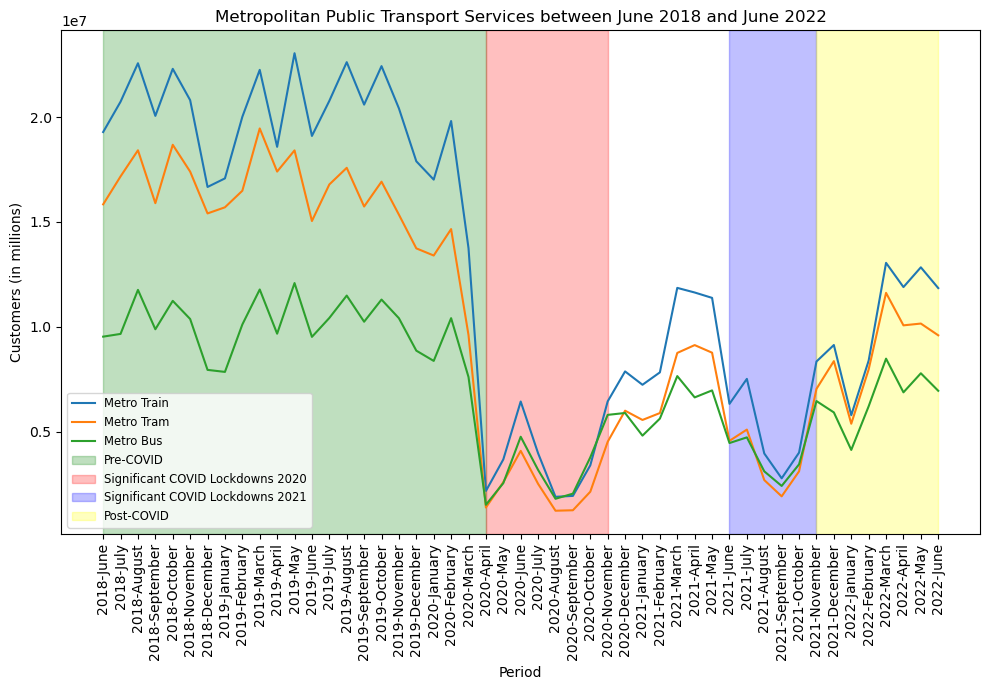

In [192]:
xvalues = monthly_pt_df["Period"]
mtrain = monthly_pt_df["Metropolitan train"]
mtram = monthly_pt_df["Metropolitan tram"]
mbus = monthly_pt_df["Metropolitan bus"]

plt.figure(figsize=(10,7))
plt.plot(xvalues,mtrain,label="Metro Train")
plt.plot(xvalues,mtram,label="Metro Tram")
plt.plot(xvalues,mbus,label="Metro Bus")
plt.title("Metropolitan Public Transport Services between June 2018 and June 2022")
plt.axvspan("2018-June", "2020-April", alpha=0.25, color='green', label="Pre-COVID")
plt.axvspan("2020-April", "2020-November", alpha=0.25, color='red', label="Significant COVID Lockdowns 2020")
plt.axvspan("2021-June", "2021-November", alpha=0.25, color='blue', label="Significant COVID Lockdowns 2021")
plt.axvspan("2021-November", "2022-June", alpha=0.25, color='yellow', label="Post-COVID")
plt.legend(loc="best", fontsize="small",fancybox=True)
plt.xlabel("Period")
plt.ylabel("Customers (in millions)")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()


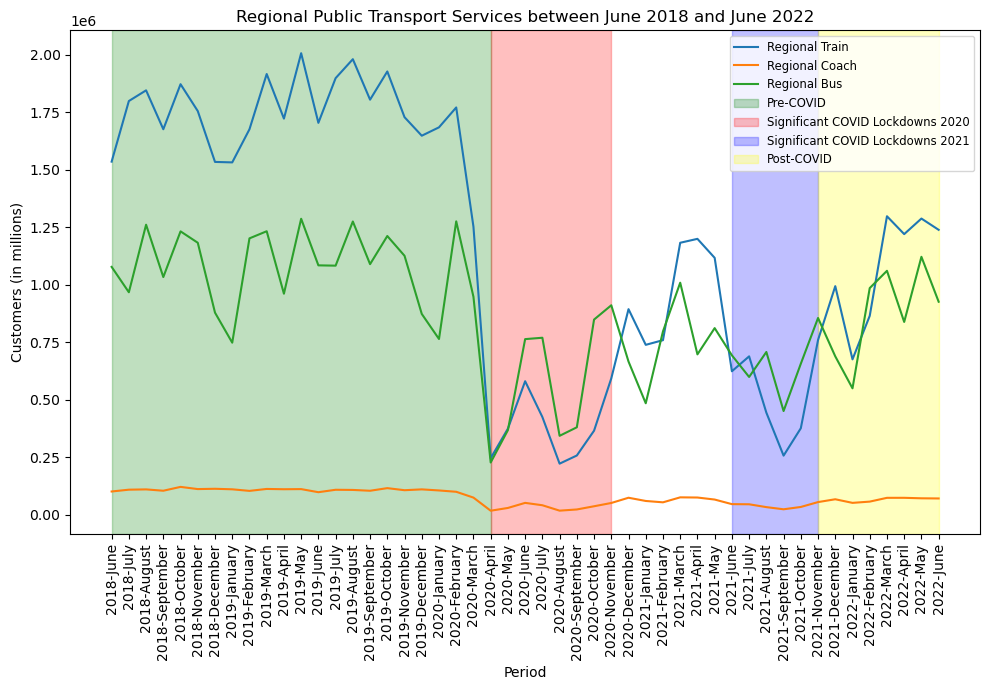

In [193]:
xvalues = monthly_pt_df["Period"]
rtrain = monthly_pt_df["Regional train"]
rcoach = monthly_pt_df["Regional coach"]
rbus = monthly_pt_df["Regional bus"]

plt.figure(figsize=(10,7))
plt.plot(xvalues,rtrain,label="Regional Train")
plt.plot(xvalues,rcoach,label="Regional Coach")
plt.plot(xvalues,rbus,label="Regional Bus")
plt.title("Regional Public Transport Services between June 2018 and June 2022")
plt.axvspan("2018-June", "2020-April", alpha=0.25, color='green', label="Pre-COVID")
plt.axvspan("2020-April", "2020-November", alpha=0.25, color='red', label="Significant COVID Lockdowns 2020")
plt.axvspan("2021-June", "2021-November", alpha=0.25, color='blue', label="Significant COVID Lockdowns 2021")
plt.axvspan("2021-November", "2022-June", alpha=0.25, color='yellow', label="Post-COVID")
plt.legend(loc="best", fontsize="small",fancybox=True)
plt.xlabel("Period")
plt.ylabel("Customers (in millions)")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

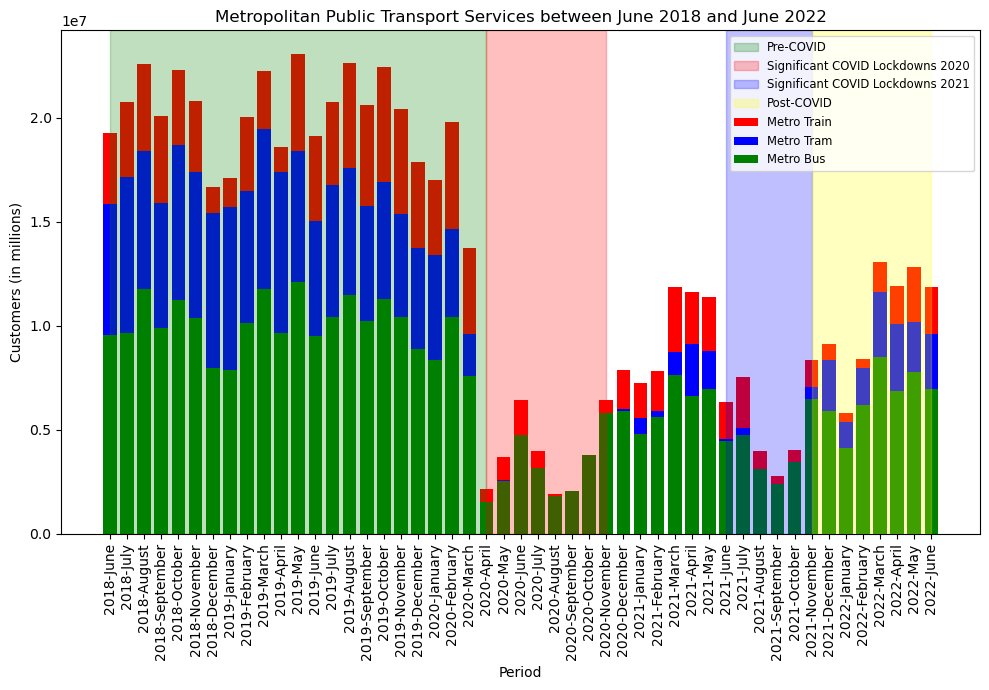

In [222]:
xvalues = monthly_pt_df["Period"]

mtrain = monthly_pt_df["Metropolitan train"]
mtram = monthly_pt_df["Metropolitan tram"]
mbus = monthly_pt_df["Metropolitan bus"]

plt.figure(figsize=(10,7))
plt.bar(xvalues, mtrain, color='r',label="Metro Train")
plt.bar(xvalues, mtram, color='b',label="Metro Tram")
plt.bar(xvalues, mbus, color='g',label="Metro Bus")
plt.title("Metropolitan Public Transport Services between June 2018 and June 2022")
plt.axvspan("2018-June", "2020-April", alpha=0.25, color='green', label="Pre-COVID")
plt.axvspan("2020-April", "2020-November", alpha=0.25, color='red', label="Significant COVID Lockdowns 2020")
plt.axvspan("2021-June", "2021-November", alpha=0.25, color='blue', label="Significant COVID Lockdowns 2021")
plt.axvspan("2021-November", "2022-June", alpha=0.25, color='yellow', label="Post-COVID")
plt.legend(loc="best", fontsize="small",fancybox=True)
plt.xlabel("Period")
plt.ylabel("Customers (in millions)")
plt.xticks(rotation="vertical")
plt.tight_layout()    
plt.show()